# Unit 2 Assesment - Monte-Carlo Models

For this assessment, you will work in the following groups

| Group | Names |
| :---: | :---: |
| 1 | Ryan and Jessie |
| 2 | Paul and Heather |
| 3 | Lily and Brandon |
| 4 | Frank and Sara |
| 5 | Daniel and Dalila|
| 6 | Nora and Sawyer|
| 7 | Izzy M., Sterling and Olivia|
| 8 | Izzy J. ad Gray|
| 9 | Aliyah and Evan|


This assement is due at the start of class on Monday September 16th.

### Working Together
- You should both be present when working on this notebook. Nobody should work on it alone. This is a group effort.
- **One** person will save the notebook in their Google Drive folder shared with me. They should then share *the notebook* with the other person's gmail account so that both individuals will have access to (and can edit) the same notebook.  Notebooks don't work the same as Google Docs, so if you are both trying to edit a notebook at the same time you will have to manually merge the changes. **After it is completely finished**, the other person should save a copy of the notebook to their Google Drive.  
- I will randomly select one person's Google Drive folder and notebook to grade the group's effort.
- The quality of your writing important. Your responses should be detailed, logical, and followable. I would strongly recommend coming back to edit your answers a day or so after initially answering the questions.

### **Using resources**

You may use your Colab notebooks from class, any other notebook or reading I have given you, and any links to web sites I have provided. Basically, if it is linked on Blackboard then you can use it.

You may not use any other person, website, book, or resource. This includes the AI features in Google Colab or any other generative AI tool (ChatGPT, etc.) You are responsible for using only approved resources. If you're unsure whether something is allowed, please ask me before using it.

You can disable the Gemini AI assistance by going to settings and unchecking `Consented to use generative AI features` and checking `Hide generative AI features.` as seen below.


### **Citing Sources**

Citing sources isn't just about copying and pasting code—it's about giving credit whenever you use ideas, inspiration, or guidance from another source, even if you don't copy directly. Here's how to handle it:

- **When to Cite**:
  - If you refer to a **specific code example** from class materials, notebooks, or a reading.
    - Example: "I used the loop structure from the `02-01-random` notebook, exercise 1."
  - When you use an **idea** or approach that you didn't come up with on your own, even if you modify it.
    - Example: "The way I calculated the probability of finding the area of a circle was based on the pre-class notebook for Day 3."
  - **Even if you don't copy-paste** code, if something influenced your thinking or the way you structured your solution, it should be cited.
  
- **What doesn't need citation**:
  - Basic ideas that come entirely from your own brain.
  - Simple language constructs like loops, if-statements, or variables, unless they come directly from an example you're referencing.

- **Key points**
  - It's always better to cite than to leave something out. You won't lose points for over-citing and I will give you feedback on what citations are required or not.
  - Don't just cite when you copy code—cite when ideas or problem-solving approaches come from an outside source.

- **Examples of Correct Citations**:
  - **Copied/Modified Code**: "We used the code from the `randomwalk1D` function in the `02-03-random-walk` notebook to help structure our loop."
  - **Concept or Inspiration**: "We based our approach for determining the circle a dart landed in on the exmaple we did in class estimating $\pi$. "


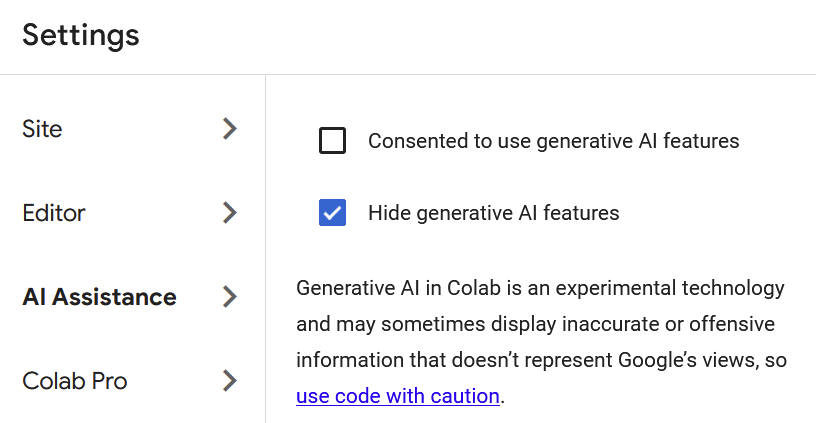

# Predicting the outcome of a presidental election

In this assessment, you will apply Monte Carlo simulations to predict the outcome of the upcoming U.S. presidential election. In this model, we will assign each state a probability of voting for a candidate based on polling or historical data. Your task is to run the simulation, analyze the results, and explore how small changes in state probabilities affect the overall prediction.

As an aside, this is probably the first election in which you're eligible to vote.  Voting is one of the most important ways you can make a difference as a U.S. citizen. If you're not yet registered to vote, or if you want to check your registration status, visit [vote.org](https://www.vote.org/).

## Defining the model
As you may know, the U.S. selects our presidents through the [Electoral College](https://en.wikipedia.org/wiki/United_States_Electoral_College). Each state has a certain number of *Electors* determined by the number of representatives that state has in the House and Senate. As an example, North Carolina has two Senators and 14 Representatives in the House, so we have 16 Electors in the Electoral College. Almost all states assign their Electors using a [first-past-the-post](https://en.wikipedia.org/wiki/First-past-the-post_voting) voting system, meaning the candidate with the most votes in a state wins all of its electors.

We will use polling data from [Nate Silver's website](https://www.natesilver.net/p/nate-silver-2024-president-election-polls-model), retrieved on September 12th, to set probabilities for each state. For states without current polling data, I estimated their probabilities using results from the 2020 election. For example, in 2020, Biden won the national vote with [51.3% of the vote to Trump's 46.8%](https://en.wikipedia.org/wiki/2020_United_States_presidential_election). In Missouri, Trump won [56.8% of the vote to Biden's 41.4%](https://en.wikipedia.org/wiki/2020_United_States_presidential_election_in_Missouri). I estimate the current polling in Missouri by adjusting the current national polling average for the Republican ticket by +10%. Likewise the Democractic ticket is adjusted -9.9% from the national average.

Since these are rough estimates, I have included a polling error to reflect uncertainty. You can find all the data used, including estimated polling numbers, [here](https://github.com/anthoak13/HNR-1303-F24/blob/F24/unit-02/02-10-problem/data.csv).

All historical election data used to estimate missing current polling data is from the [MIT Election Data + Science Lab](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/42MVDX&version=8.0).


Before continuing, make sure you run the cell below to load in the required python packages.

In [ ]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import pandas as pd

# Exercise 1

To start, let's simulate the outcome of the presidential election as if the Electoral College did not exist. Let's assume that the true vote follows a Gaussian distribution centered at the polling average with some spread.

The current national polling average, according to Nate Silver, is:

| Harris (%) | Trump (%) |
| :---: | :---: |
| 48.7 | 46.8 |

Most polls have *margin of error* of about 4% or 5% which corresponds to a standard deviation of about 2%. Since this is the average of many polls, let's reduce that a bit more and assume the standard deviation, $\sigma$, is 1.5%.

**Simulate a single outcome of the national vote.** To do this, generate a random number following a Gaussian disribution that represents the share of the vote by Harris with a mean of 48.7% and a standard deviation of 1.5%. Then generate a random number following a Gaussian disribution that represents the share of the vote by Trump with a mean of 46.8% and a standard deviation of 1.5%.

**Report on the outcome of your one trial of the election: What was the result? Do the combined precentages of Harris and Tump add up to 100%? Why or why not?**

# Exercise 2

Let's wrap this in a python function to make our lives easier. What we care about simulating is who wins the election and we do not care by how much they win. So let's define a function that takes in three variables: the polling average for Harris (`harris`), the poling averge for Trump (`trump`), and the polling error (`error`). The function should print who won the election based on these random values. This function will serve later as a single "trial" in our Monte-Carlo simulation.

Using your code from Exercise 1 as a guide, adapt the function below so that the random numbers generated follow Gaussian distributions with means `harris` and `trump` and a standard deviation of `error`.  

In [ ]:
def runElection(harris, trump, error):
  ####
  # For you: Randomize the vote
  harrisVote = 1
  trumpVote = 1
  ####

  # If harrisVote is large print "Harris wins" otherwise print "Trump wins"


Run the code cell below a few times to check that your code is working as you intend.

In [ ]:
runElection(48.7, 46.8, 1.5)

Harris wins


# Exercise 3

Let's make one final modification to our function `runElection`. Copy your function from Exercise 2 into the code cell below and **rename it `runSingleElection()`** (i.e. `def runSingleElection()`). Then modify it so if Harris wins, it returns `True` and if Trump wins it returns `False`. This allows us to easily check who won the election each time we call the function. To differentiate the two functions, we will name this new function `runSingleElection()`.

As an example, the code below flips a coin and returns `True` if it's heads and `False` if it's false.

```
def flipCoin()
  val = rand.random()
  if val < 0.5: # if val < 0.5, it's heads
    return True
  else: # otherwise it's tails
    return False
```

Modify your `runSingleElection` function similarly, returning `True` for a Harris win and `False` for a Trump win.

# Exercise 4

Let's calculate the probability that Harris or Trump win the election.

In the code cell below, wrap your function from Exercise 3, `runSingleElection` in a loop to simulate multiple elections. Record how many times Trump wins and how many times Harris wins. **What is the probability that Harris wins the national vote? What is the probability that Trump wins the national vote?**

# Exercise 5

Now that we've simulated a popular vote election, it's time to apply the Electoral College system by simulating elections state-by-state.

In the code cell below, I have written a function called `runElectoralCollege()` that simulates a full election using your `runSingleElection` function from Exercise 3 (the code will not run if you have not completed that Exercise!)

The runElectoralCollege() function simulates an election for each state based on its polling data and returns the total number of electors won by Harris.

In [ ]:
# Load in all the polling data and number of electors for each state
df = pd.read_csv("https://raw.githubusercontent.com/anthoak13/HNR-1303-F24/F24/unit-02/02-10-problem/data.csv", header=0)
states = df["State"].to_list()
electors = df["Electors"].to_list()
pollHarris = df["Dem"].to_list()
pollTrump = df["Rep"].to_list()
pollError = df["Sigma"].to_list()

def runElectoralCollege():
  harrisVotes = 0
  trumpVotes = 0

  for i in range(len(states)):
    harrisWins = runSingleElection(pollHarris[i], pollTrump[i], pollError[i])
    if harrisWins:
      harrisVotes += electors[i]
    else:
      trumpVotes += electors[i]

  return harrisVotes

**Call the function `runElectoralCollege()` below and print out if Harris or Trump won the election**. To win the election, a candidate must win at least 270 electors.

In [ ]:
runElectoralCollege()

286

Wrap the `runElectoralColege()` in a loop to simulate multiple elections. Record how many times Trump wins and how many times Harris wins. **What is the probability that Harris wins the presidency? What is the probability that Trump wins the presidency?**

# Exercise 6

Now, let's compare the results from the national vote simulation (Exercise 4) with the results from the Electoral College simulation (Exercise 5).

Does the probability that Harris wins the national vote (from Exercise 4) match the probability that Harris wins the presidency (from Exercise 5)? Why or why not?

If the probabilities don't match, explain whether the Electoral College system appears to benefit Trump or Harris.

# Exercise 7

The effect you discussed in the previous exercise is often called the **Electoral College bias**, which has shifted over time between benefiting different political parties. One way to quantify this bias is by adjusting the polling averages in each state by a fixed amount.

Below is a function called `runBiasedElectoralCollege(bias)`. This function should adjust the polling averages for Trump and Harris by a fixed bias amount and simulates the election based on the adjusted polling averages. **Make the required changes to the code to adjust the polling averages using the bias** then run the code cell.

In [ ]:
# bias is how much we should
def runBiasedElectoralCollege(bias):
  harrisVotes = 0
  trumpVotes = 0

  for i in range(len(states)):
    ####
    # For you to do: adjust the polling averages using the bias
    biasedHarris = pollHarris[i]
    biasedTrump = pollTrump[i]
    ####

    harrisWins = runSingleElection(biasedHarris, biasedTrump, pollError[i])
    if harrisWins:
      harrisVotes += electors[i]
    else:
      trumpVotes += electors[i]

  return harrisVotes


Using your code from Exercise 6 as a guide, simulate many elections using the `runBiasedElectoralCollege()` function instead of the `runElectoralCollege()` function. By trial and error, adjust the polling data `bias` so that the probability Harris wins the Electoral College is the same as the probability that she wins the national vote (from your result in Exercise 4). **What amount of bias did you have to add for the electoral college result to match the national vote result?**

# Exercise 8

The **margin of victory** refers to the difference in the percentage of total votes or electoral votes between the winning candidate and the losing candidate. For the national vote, this is the difference in percentages (e.g., Harris wins 51% and Trump wins 47%, so the margin of victory is 4%). For the Electoral College, it's the difference in the number of electors won by each candidate divided by the total number of electors (e.g., Harris wins 281 and Trump wins 257 the margin of victory is $\frac{281-257}{538} = 4.4\%$).


How does the bias you applied in Exercise 7 affect the margin of victory in the Electoral College compared to the national vote?
  - Is the Electoral College outcome more sensitive to small changes in polling (bias) than the national vote outcome?
  - Does the Electoral College tend to amplify or reduce the margin of victory for the winning candidate compared to the popular vote?
  - Support your answer with evidence from your simulations. You may want to run additional simulations below to calculate things like the margin of victory.

# Exercise 9

Comment on the strengths of the members of your group. What strengths did each person bring to the team?